<a href="https://colab.research.google.com/github/SantosAbimaelRomero/Sales-Preditions/blob/main/Sales_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Statistics - Part 1
- Santos Romero

## Loading Data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [ ]:
sales_csv = pd.read_csv('/content/drive/MyDrive/Stack Projects/Project 1, Sales Predictions/sales_predictions.csv')

## Data Cleaning

### Overview of Data

In [ ]:
sales_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_csv.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


General Info
- 8523 rows
- 11 Columns
> - Item_Weight and Outlet_Size have NaNs
> - No data type issues

### Checking for duplicates

In [ ]:
sales_csv.duplicated().sum()
# Nothing was printed, contains no duplicates

0

### Missing Values

In [ ]:
sales_csv.isna().sum()
# Item_Weight and Outlet_Size are missing data

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Outlet_Size

Let's look for patterns with the other two related columns, Outlet_Location_Type and Outlet_Type

In [ ]:
sales_csv.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()
# Tier 1s are mostly small but can be any size
# Tier 2s are all small
# Tier 3s are mostly medium but can be High

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [ ]:
sales_csv.groupby('Outlet_Type')['Outlet_Size'].value_counts()
# Grocery Stores are all small
# Supermarket Type1s are mostly small but can be any size
# Supermarket Type2s and Type3s are all medium

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

Small
- Tier 2s are always small, grocery stores are always small
- Tier 1s are mostly small, Supermarket Type 1s are mostly small

Medium
- Tier 3s are mostly medium, Tier 1s are less likely but can be medium
- Supermarket Type 2 & 3 are only medium, Type 1s are less likely but can be medium

High
- Tier 3s are the only highs
- Supermarket Type 1s are the only highs

In [ ]:
# Let's Start with what we are certain on
# Tier 2s are all small and Grocery Stores are all small
# Supermarket Type2s and Type3s are all medium
# Since the index for out Dataframe is just numbers from 0 - 8523
# Let's loop through the index
for index in range(len(sales_csv)):
    if sales_csv.loc[index, 'Outlet_Location_Type'] == 'Tier 2':
        sales_csv.loc[index, 'Outlet_Size'] = 'Small'
    elif sales_csv.loc[index, 'Outlet_Type'] == 'Grocery Store':
        sales_csv.loc[index, 'Outlet_Size'] = 'Small'
    elif sales_csv.loc[index, 'Outlet_Type'] == 'Supermarket Type2':
        sales_csv.loc[index, 'Outlet_Size'] = 'Medium'
    elif sales_csv.loc[index, 'Outlet_Type'] == 'Supermarket Type3':
        sales_csv.loc[index, 'Outlet_Size'] = 'Medium'


In [ ]:
sales_csv.isna().sum()
# That seems to have been all of them

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Item_Weight

For my purpose with this data, the weight of the items is irrelavent as I am not concered with shipping. Only the in-person sales that occur at the supermarkets/grocery stores are my focus. I shall drop the column entirely.

In [ ]:
# Drop Item_Weight Column
sales_csv.drop(columns='Item_Weight', inplace=True)
sales_csv.isna().sum()
# There are now no missing values in our data

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Incorrect Values

In [ ]:
sales_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


Let's go through each column where this might be an issue

In [ ]:
sales_csv['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_csv['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
sales_csv['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
sales_csv['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
sales_csv['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_csv['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
sales_csv['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
sales_csv['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
sales_csv['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
sales_csv['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
sales_csv['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Only Item_Fat_Content had value issues

## Exploratory Visuals

### Summary Statistics

In [ ]:
# Basic Statistics for all relevant number columns
print(f"""Item Visibility:
Minimum:{sales_csv['Item_Visibility'].min()}
Maximum:{sales_csv['Item_Visibility'].max().round(4)}
Average:{sales_csv['Item_Visibility'].mean().round(4)}
""")
print(f"""Item MRP:
Minimum:${sales_csv['Item_MRP'].min()}
Maximum:${sales_csv['Item_MRP'].max().round(2)}
Average:${sales_csv['Item_MRP'].mean().round(2)}
""")
print(f"""Item Outlet Sales:
Minimum:${sales_csv['Item_Outlet_Sales'].min()}
Maximum:${sales_csv['Item_Outlet_Sales'].max().round(2)}
Average:${sales_csv['Item_Outlet_Sales'].mean().round(2)}
""")

Item Visibility:
Minimum:0.0
Maximum:0.3284
Average:0.0661

Item MRP:
Minimum:$31.29
Maximum:$266.89
Average:$140.99

Item Outlet Sales:
Minimum:$33.29
Maximum:$13086.96
Average:$2181.29



### Low Fat vs Regular

Checking for relationship between fat contents and total sales.

In [ ]:
# Renaming Total Outlet Sales Column
sales_csv.rename(columns = {'Item_Outlet_Sales':'Outlet Sales', 'Item_MRP':'Item MRP'}, inplace=True)

In [ ]:
low_fat = sales_csv[sales_csv['Item_Fat_Content'] == 'Low Fat']
reg_fat = sales_csv[sales_csv['Item_Fat_Content'] == 'Regular']
low_fat.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [ ]:
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"₹{x*1e-3:,.0f}K"

def hundred(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in hundreds"""
    return f"₹{x:,.0f}"

def fat_dist(data,x,y,format_price,figsize=(10,5)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.rcParams.update( {'font.family':'serif'})


    sns.histplot(data=data,x=x,ax=ax)
    ax.set_xlim(left=data[x].min(), right=data[x].max())
    ax.set_xlabel(x,fontsize=15)


    mean_price = data[x].mean()
    ax.axvline(mean_price,color='orange', ls='--', lw=3,
    label=f"Mean {x} = ₹{mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='red', ls=':', lw=3,
               label=f"Median {x} = ₹{med_price:,.2f}");
    ax.legend(loc=(1.02,.8));


    if format_price == 1:

        ax.set_title(f'Distribution of Outlet Sales for {y} Items',
                     fontsize=18, fontweight='bold')
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if format_price == 2:

        ax.set_title(f'Distribution of Item MRP for {y} Items',
                     fontsize=18, fontweight='bold')
        price_fmt_100 = FuncFormatter(hundred)
        ax.xaxis.set_major_formatter(price_fmt_100)

    return fig,ax

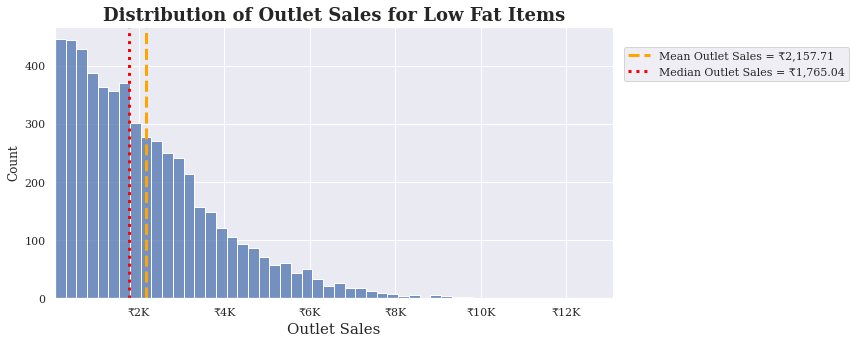

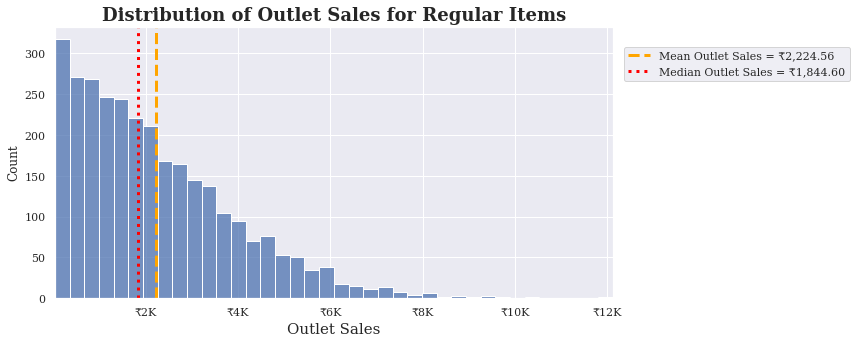

In [ ]:
fat_dist(low_fat, 'Outlet Sales', 'Low Fat', 1)
fat_dist(reg_fat, 'Outlet Sales', 'Regular', 1);

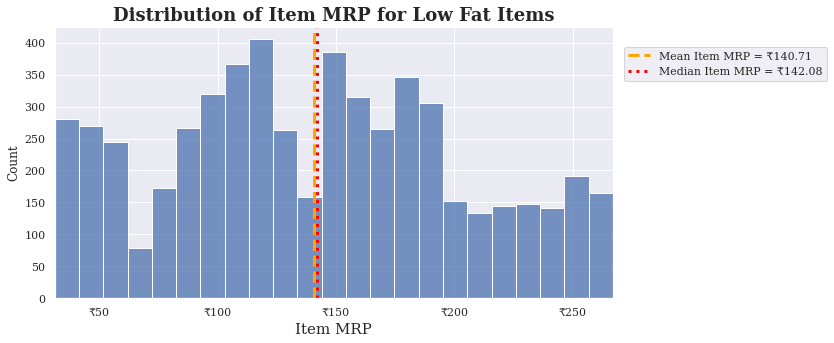

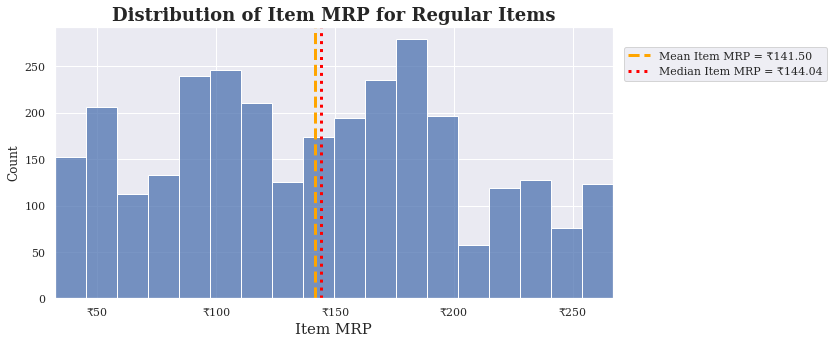

In [ ]:
fat_dist(low_fat, 'Item MRP', 'Low Fat', 2)
fat_dist(reg_fat, 'Item MRP', 'Regular', 2);

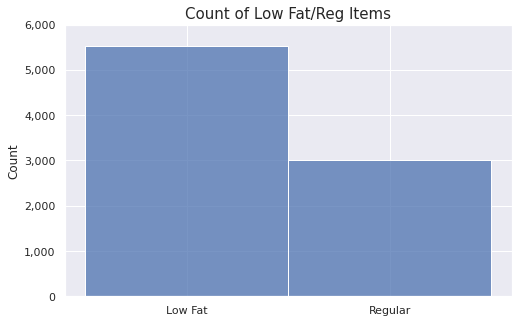

,Outlet Sales
Item_Fat_Content,
Low Fat,11904094.53
Regular,6687030.88


In [ ]:
price_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f}')

fig, ax = plt.subplots(figsize = (8,5))

sns.histplot(data=sales_csv, x='Item_Fat_Content')
ax.set_ylim(bottom=0, top=6000)
plt.title('Count of Low Fat/Reg Items', fontsize=15)
plt.xlabel('')
ax.yaxis.set_major_formatter(price_fmt)
plt.show();


sales_csv.groupby('Item_Fat_Content')[['Outlet Sales']].sum().round(2)



Most of the items sell under ₹4,000 total whether regular or low fat content.

---
There is a much larger selection of low fat food items available but
regular items have a slightly larger mean and median in outlet sales despite having less items available.

---
Distribution of total outlet sales is mostly the same despite there being a much larger selection of low fat items than regular items.

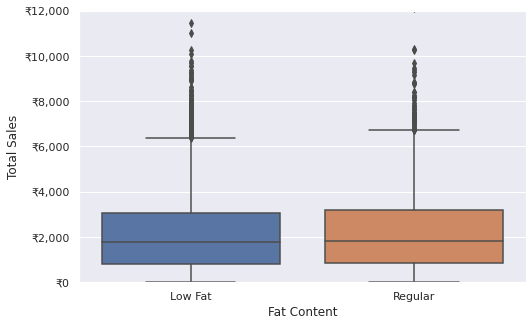

In [ ]:
price_fmt = mpl.ticker.StrMethodFormatter('₹{x:,.0f}')

fig, ax = plt.subplots(figsize=(8,5))

sns.boxplot(data=sales_csv, x='Item_Fat_Content', y='Outlet Sales')
plt.xlabel('Fat Content')
plt.ylabel('Total Sales')
ax.yaxis.set_major_formatter(price_fmt)
ax.set_ylim(bottom=0, top=12000)
plt.show();

Regular fat food items have a higher and broader IQR than low fat food items.

---
Regular food items have a higher maximum than low fat food items.

---
Low fat food items have higher outliers than regular food items.

### Outlet Type and Total Sales

In [ ]:
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"₹{x*1e-3:,.0f}K"


def size_dist(data,x,y,format_price=True,figsize=(10,5)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.rcParams.update( {'font.family':'serif'})

    ax.set_title(f'Distribution of Outlet Sales for {y} Outlets',
                 fontsize=18, fontweight='bold')
    sns.histplot(data=data,x=x,ax=ax)
    ax.set_xlim(left=data[x].min(), right=data[x].max())
    ax.set_xlabel(x,fontsize=15)


    mean_price = data[x].mean()
    ax.axvline(mean_price,color='orange', ls='--', lw=3,
    label=f"Mean {x} = ₹{mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='red', ls=':', lw=3,
               label=f"Median {x} = ₹{med_price:,.2f}");
    ax.legend(loc=(1.02,.8));


    if format_price:

        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

In [ ]:
small = sales_csv[sales_csv['Outlet_Size'] == 'Small']
medium = sales_csv[sales_csv['Outlet_Size'] == 'Medium']
high = sales_csv[sales_csv['Outlet_Size'] == 'High']

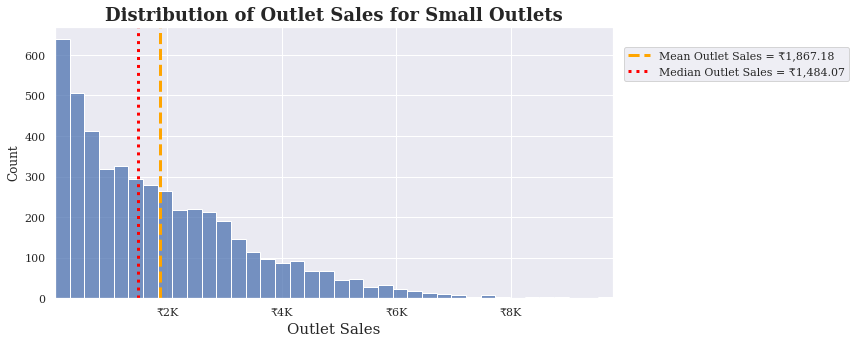

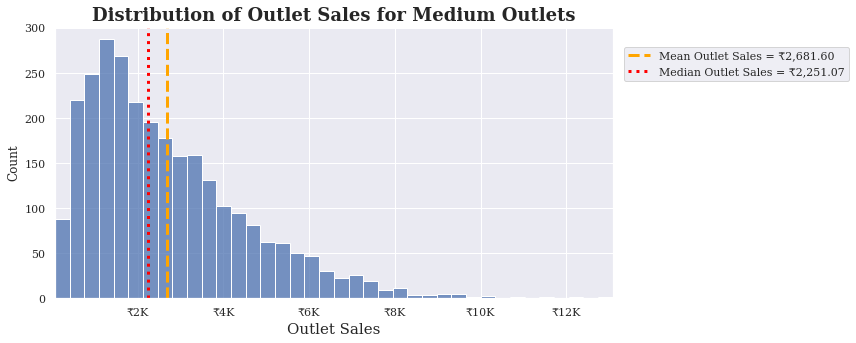

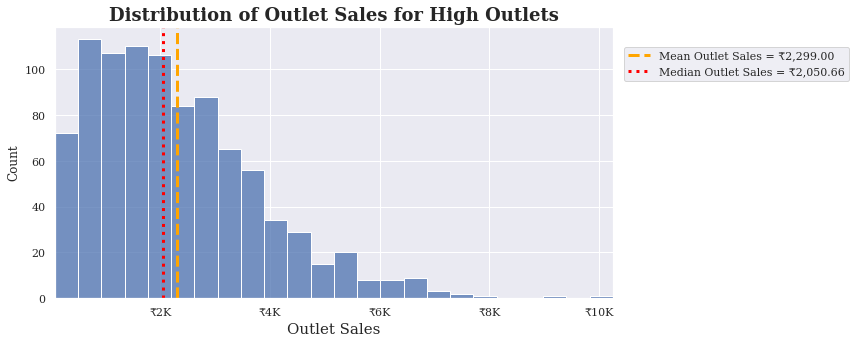

In [ ]:
size_dist(small, 'Outlet Sales', 'Small')
size_dist(medium, 'Outlet Sales', 'Medium')
size_dist(high, 'Outlet Sales', 'High');

Small outlets have items that produce the least sales; peaks at less than ₹1,000 and only goes down from there but it does have the largest count, meaning the most items.

---
Medium outlets have a very notable peak between ₹1,000 and ₹2,000 then drops fairly quickly, with the second largest count, meaning the second largest selection of items.

---
High outlets have the most stable peak, despite some variance it's fairly consistent between ₹500 and ₹2,000 and then drops gradually. Though it does have the smallest count, meaning the smallest selection of total items.

In [ ]:
print(f"""Small Outlets have a total of {len(small)} items.
The largest selection of items in any outlet in our data.
""")
print(f"""Medium Outlets have a total of {len(medium)} items.
Half the total selection of items in Small Outlets.
""")
print(f"""High Outlets have a total of {len(high)} items.
The smallest selection of items out of any Outlet in our data.
""")

Small Outlets have a total of 4798 items.
The largest selection of items in any outlet in our data.

Medium Outlets have a total of 2793 items.
Half the total selection of items in Small Outlets.

High Outlets have a total of 932 items.
The smallest selection of items out of any Outlet in our data.



In [ ]:
print(f"""Small Outlets produces a total of ₹{small['Outlet Sales'].sum().round(2):,.0f} in sales.
The greatest total sales in any outlet in our data.
""")
print(f"""Medium Outlets produces a total of ₹{medium['Outlet Sales'].sum().round(2):,.0f} in sales.
The second highest total sales in any outlet in our data.
""")
print(f"""High Outlets produces a total of ₹{high['Outlet Sales'].sum().round(2):,.0f} in sales.
The smallest total sales in any outlet in our data.
""")

Small Outlets produces a total of ₹8,958,743 in sales.
The greatest total sales in any outlet in our data.

Medium Outlets produces a total of ₹7,489,719 in sales.
The second highest total sales in any outlet in our data.

High Outlets produces a total of ₹2,142,664 in sales.
The smallest total sales in any outlet in our data.



Small outlets have the greatest selection of items, despite any individual item producing less sales than in medium and high outlets, it still produces the greatest amount of total sales overall simply out of the sheer volume of items.

---
Medium outlets have the second largest selection of items, it also has more expensive items and items that can produce greater total sales individually than items in small outlets. It comes as a close second making a about ₹1,500,000 less than small outlets.

---
High outlets have the smallest selection of items and produces the smallest total sales by a large margin than small and medium outlets. Despite have high value items than can consistenly make more sales individually than the other two outlet sizes, it produces a notable ~₹5,000,000 less in total sales than medium outlets and ~₹6,800,000 less than small outlets.